In [1]:
conda install -c conda-forge/label/cf202003 pandas-profiling

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

In [3]:
dataset = pd.read_excel(r'C:\Users\91831\Desktop\Mall_Customers.xlsx')

In [4]:
dataset= pd.DataFrame(dataset)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
report = ProfileReport(dataset)

print(repr(report.report))

report.to_widgets()

In [6]:
X=dataset.iloc[:,[3,4]].values

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]

In [9]:
for i in range (1,18):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


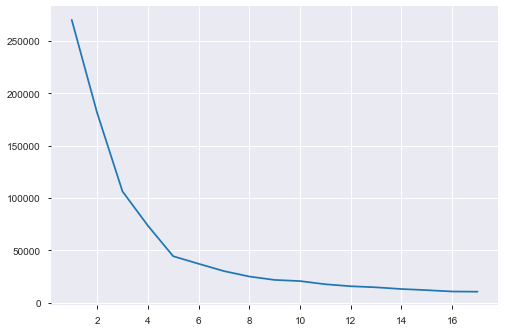

In [10]:
plt.plot(range(1,18),wcss)
plt.show()

In [11]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)
pd.DataFrame(y_kmeans)

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


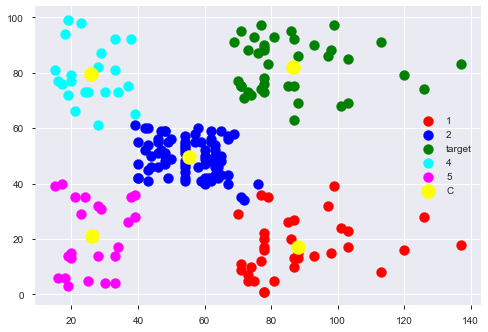

In [12]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="target")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c="cyan",label="4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c="magenta",label="5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="yellow",label="C")

plt.legend()


plt.show()